In [3]:
conda install tensorflow


Note: you may need to restart the kernel to use updated packages.Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Hi\anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py39_0           7 KB
    _tflow_select-2.3.0        |              mkl           3 KB
    abseil-cpp-20211102.0      |       hd77b12b_0         1.7 MB
    absl-py-1.3.0              |   py39haa95532_0         171 KB
    aiohttp-3.8.3              |   py39h2bbff1b_0        


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/noarch::nltk==3.6.5=pyhd3eb1b0_0
  - defaults/win-64::scikit-learn-intelex==2021.3.0=py39haa95532_0

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/noarch::nltk==3.6.5=pyhd3eb1b0_0
  - defaults/win-64::scikit-learn-intelex==2021.3.0=py39haa95532_0
DEBUG menuinst_win32:__init__(201): Menu: name: 'Anaconda${PY_VER} ${PLATFORM}', prefix: 'C:\Users\Hi\anaconda3', env_name: 'None', mode: 'user', used_mode: 'user', root_prefix: 'C:\Users\Hi\anaconda3'
DEBUG menuinst_win32:create(328): Shortcut cmd is C:\Users\Hi\anaconda3\pythonw.exe, args are ['C:\\Users\\Hi\\anaconda3\\cwp.py', 'C:\\Users\\Hi\\anaconda3', 'C:\\Users\\Hi\\anaconda3\\pythonw.exe', 'C:\\Users\\Hi\\anacon


    google-pasta-0.2.0         |     pyhd3eb1b0_0          46 KB
    grpc-cpp-1.48.2            |       hf108199_0        23.5 MB
    grpcio-1.48.2              |   py39hf108199_0         2.0 MB
    joblib-1.1.1               |   py39haa95532_0         383 KB
    jpeg-9e                    |       h2bbff1b_1         320 KB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 KB
    keras-2.10.0               |   py39haa95532_0         1.5 MB
    keras-preprocessing-1.1.2  |     pyhd3eb1b0_0          35 KB
    libcurl-7.88.1             |       h86230a5_0         328 KB
    libprotobuf-3.20.3         |       h23ce68f_0         2.2 MB
    libssh2-1.10.0             |       hcd4344a_0         222 KB
    m2-msys2-runtime-2.5.0.17080.65c939c|                3         3.0 MB
    m2-patch-2.7.5             |                2          89 KB
    markdown-3.4.1             |   py39haa95532_0         148 KB
    multidict-6

tensorflow-base-2.10 | 75.4 MB   | #########9 | 100% 
tensorflow-base-2.10 | 75.4 MB   | #########9 | 100% 
tensorflow-base-2.10 | 75.4 MB   | ########## | 100% 

ca-certificates-2023 | 121 KB    |            |   0% 
ca-certificates-2023 | 121 KB    | ########## | 100% 
ca-certificates-2023 | 121 KB    | ########## | 100% 

grpcio-1.48.2        | 2.0 MB    |            |   0% 
grpcio-1.48.2        | 2.0 MB    | #          |  10% 
grpcio-1.48.2        | 2.0 MB    | ##6        |  27% 
grpcio-1.48.2        | 2.0 MB    | ####3      |  43% 
grpcio-1.48.2        | 2.0 MB    | #####9     |  59% 
grpcio-1.48.2        | 2.0 MB    | #######4   |  75% 
grpcio-1.48.2        | 2.0 MB    | #########  |  91% 
grpcio-1.48.2        | 2.0 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

    Windows 64-bit packages of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are availab

In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
import time

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
import keras
keras.__version__

'2.10.0'

In [2]:
sdir='C:/Users/Hi/PycharmProjects/FYP2/Plant_leave_diseases_dataset_with_augmentation'
min_samples=40 # set limit for minimum images a class must have to be included in the dataframe
filepaths = []
labels=[]
classlist=os.listdir(sdir)
for klass in classlist:
    classpath=os.path.join(sdir, klass)
    flist=os.listdir(classpath)
    if len(flist) >= min_samples:
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
    else:
        print('class ', klass, ' has only', len(flist), ' samples and will not be included in dataframe')
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
train_df, dummy_df=train_test_split(df, train_size=.9, shuffle=True, random_state=123, stratify=df['labels'])
valid_df, test_df=train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
# get the number of classes and the images count for each class in train_df
classes=sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

# get the classes with the minimum and maximum number of train images
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)
# lets get the average height and width of a sample of the train images
ht=0
wt=0
# select 100 random samples of train_df
train_df_sample=train_df.sample(n=100, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

train_df lenght:  54308   test_df length:  3018   valid_df length:  3017
The number of classes in the dataset is:  38
            CLASS               IMAGE COUNT 
      Apple___Apple_scab            900     
      Apple___Black_rot             900     
   Apple___Cedar_apple_rust         900     
       Apple___healthy             1481     
     Blueberry___healthy           1352     
   Cherry___Powdery_mildew          947     
       Cherry___healthy             900     
Corn___Cercospora_leaf_spot Gray_leaf_spot      900     
      Corn___Common_rust           1073     
 Corn___Northern_Leaf_Blight        900     
        Corn___healthy             1046     
      Grape___Black_rot            1062     
 Grape___Esca_(Black_Measles)      1245     
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)      968     
       Grape___healthy              900     
Orange___Haunglongbing_(Citrus_greening)     4956     
    Peach___Bacterial_spot         2067     
       Peach___healthy              90

In [3]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    groups=df.groupby(column)
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique():
        group=groups.get_group(label)
        count=len(group)
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    return trimmed_df

max_samples=200 # since each class has more than 200 images all classes will be trimmed to have 200 images per class
min_samples=36
column='labels'
train_df= trim(train_df, max_samples, min_samples, column)

after trimming, the maximum samples in any class is now  200  and the minimum samples in any class is  36


In [4]:
def balance(df, n, working_dir, img_size):
    df=df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir=os.path.join(working_dir, 'aug')# directory to store augmented images
    if os.path.isdir(aug_dir):# start with an empty directory
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)
    for label in df['labels'].unique():
        dir_path=os.path.join(aug_dir,label)
        os.mkdir(dir_path) # make class directories within aug directory
    # create and store the augmented images
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=df.groupby('labels') # group by class
    for label in df['labels'].unique():  # for every class
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label
        sample_count=len(group)   # determine how many samples there are in this class
        if sample_count< n: # if the class has less than target number of images
            aug_img_count=0
            delta=n - sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images
            msg='{0:40s} for class {1:^30s} creating {2:^5s} augmented images'.format(' ', label, str(delta))
            print(msg, '\r', end='') # prints over on the same line
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=img_size,
                                            class_mode=None, batch_size=1, shuffle=False,
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    aug_fpaths=[]
    aug_labels=[]
    classlist=os.listdir(aug_dir)
    for klass in classlist:
        classpath=os.path.join(aug_dir, klass)
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            aug_fpaths.append(fpath)
            aug_labels.append(klass)
    Fseries=pd.Series(aug_fpaths, name='filepaths')
    Lseries=pd.Series(aug_labels, name='labels')
    aug_df=pd.concat([Fseries, Lseries], axis=1)
    df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is now ', len(df))
    return df

n=200 # number of samples in each class
working_dir=r'./' # directory to store augmented images
img_size=(200,200) # size of augmented images
train_df=balance(train_df, n, working_dir, img_size)

Initial length of dataframe is  7600
Total Augmented images created=  0
Length of augmented dataframe is now  7600


C:\Users\Hi\AppData\Local\Temp/ipykernel_18384/1505794195.py:45: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Fseries=pd.Series(aug_fpaths, name='filepaths')
C:\Users\Hi\AppData\Local\Temp/ipykernel_18384/1505794195.py:46: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Lseries=pd.Series(aug_labels, name='labels')


In [8]:
batch_size=20 # We will use and EfficientetB3 model, with image size of (200, 250) this size should not cause resource error
trgen=ImageDataGenerator(horizontal_flip=True,rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2 )
t_and_v_gen=ImageDataGenerator()
msg='{0:70s} for train generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
msg='{0:70s} for valid generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
# for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
msg='{0:70s} for test generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
# from the generator we can get information we will need later
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

Found 7600 validated image filenames belonging to 38 classes.          for train generator 
Found 3017 validated image filenames belonging to 38 classes.          for valid generator 
Found 3018 validated image filenames belonging to 38 classes.          for test generator 
test batch size:  6   test steps:  503  number of classes :  38


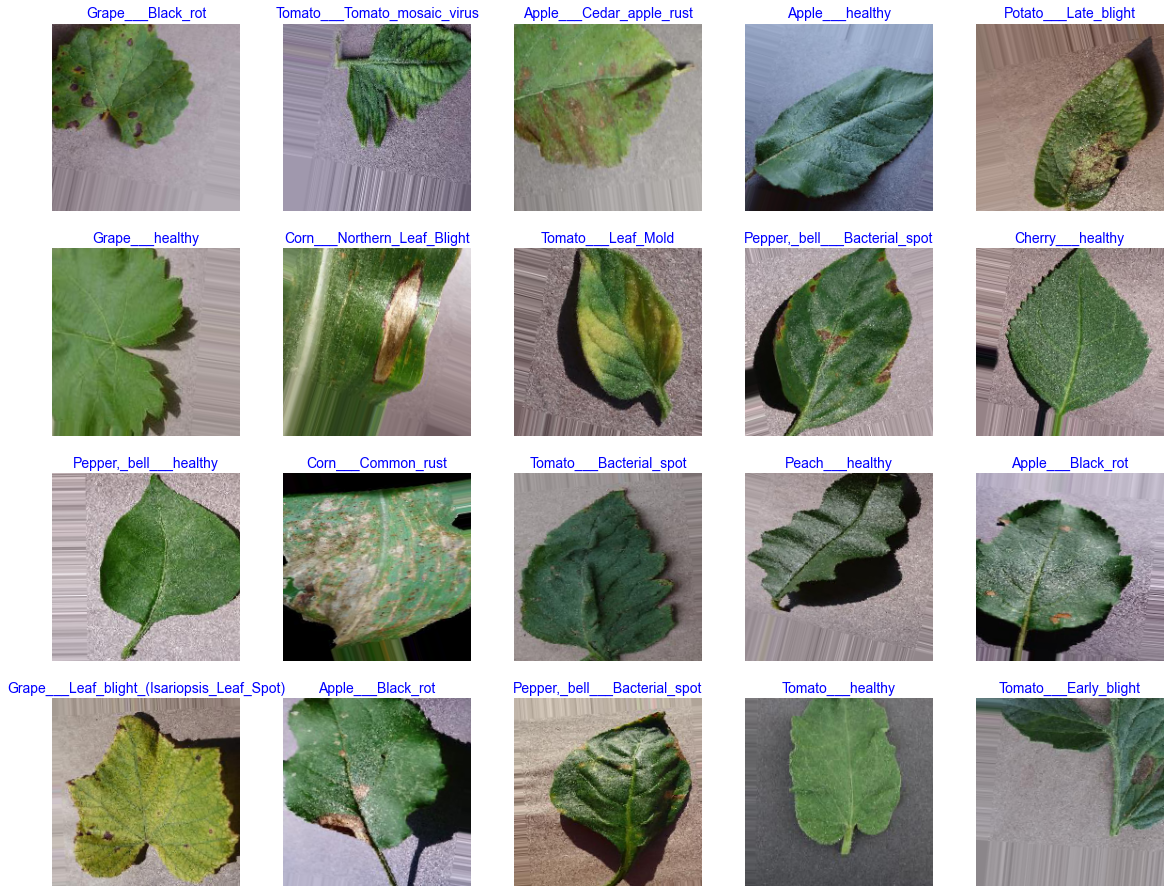

In [7]:
def show_image_samples(gen):
    t_dict = gen.class_indices
    classes = list(t_dict.keys())
    images, labels = next(gen)  # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:  # show maximum of 25 images
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = classes[index]
        plt.title(class_name, color='blue', fontsize=14)
        plt.axis('off')
    plt.show()

show_image_samples(train_gen)

Inception V3 model with transfer learning

In [19]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load the pre-trained Inception-v3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(class_count, activation='softmax')(x)  # Replace `num_classes` with the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

 batch_normalization_193 (Batch  (None, 35, 35, 64)  192         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 35, 35, 64)  192         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_198 (Batch  (None, 35, 35, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 35, 35, 32)  96          ['conv2d_199[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_210 (Batch  (None, 35, 35, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_210 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_210[0][0]']
                                                                                                  
 conv2d_208 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_214[0][0]',         
                                                                  'activation_217[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_nor

                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_232 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_232 (Batch  (None, 17, 17, 160)  480        ['conv2d_232[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_23

 batch_normalization_242 (Batch  (None, 17, 17, 160)  480        ['conv2d_242[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 conv2d_243 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_242[0][0]']         
                                                                                                  
 batch_normalization_243 (Batch  (None, 17, 17, 160)  480        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_253 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_253 (Batch  (None, 17, 17, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 conv2d_249 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_253[0][0]']         
          

 activation_261 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_258 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_262 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_258 (Batch  (None, 17, 17, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 17, 17, 192)  576        ['conv2d_262[0][0]']             
 Normaliza

 conv2d_272 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_264 (Batch  (None, 8, 8, 320)   960         ['conv2d_264[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_266 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_266[0][0]']
                                                                                                  
 activation_267 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_270[0][0]']
          

                                                                                                  
 activation_276 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_276[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_279[0][0]']
                                                                                                  
 activation_280 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 batch_normalization_281 (Batch  (None, 8, 8, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [20]:
# Train the model
steps_per_epoch = len(train_gen)
validation_steps = len(valid_gen)
epochs = 5

# Train the model
history = model.fit(train_gen, epochs=epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=valid_gen, validation_steps=validation_steps)

Epoch 1/5
380/380 [==============================] - 478s 1s/step - loss: 6.2974 - accuracy: 0.0333 - val_loss: 3.6315 - val_accuracy: 0.0222
Epoch 2/5
380/380 [==============================] - 449s 1s/step - loss: 3.6253 - accuracy: 0.0359 - val_loss: 3.6248 - val_accuracy: 0.0182
Epoch 3/5
380/380 [==============================] - 508s 1s/step - loss: 3.6369 - accuracy: 0.0247 - val_loss: 3.6274 - val_accuracy: 0.0206
Epoch 4/5
380/380 [==============================] - 573s 2s/step - loss: 3.6356 - accuracy: 0.0267 - val_loss: 3.6364 - val_accuracy: 0.0169
Epoch 5/5
380/380 [==============================] - 472s 1s/step - loss: 3.6226 - accuracy: 0.0291 - val_loss: 3.6161 - val_accuracy: 0.0275


In [21]:
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

503/503 [==============================] - 134s 266ms/step - loss: 3.6170 - accuracy: 0.0265
Test Loss: 3.617039680480957
Test Accuracy: 0.026507621631026268


InceptionV3 Model transfer learning

In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load the pre-trained Inception-v3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Create a new model
model = Sequential()

# Add the InceptionV3 base model
model.add(base_model)

# Add a global average pooling layer
model.add(GlobalAveragePooling2D())

# Add a dense layer for classification
model.add(Dense(256, activation='relu'))

# Add the output layer with the number of classes
num_classes = 38  # Replace with the number of classes in your dataset
model.add(Dense(class_count, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 256)               524544    
                                                                 
 dense_6 (Dense)             (None, 38)                9766      
                                                                 
Total params: 22,337,094
Trainable params: 22,302,662
Non-trainable params: 34,432
_________________________________________________________________


In [23]:
# Train the model
steps_per_epoch = len(train_gen)
validation_steps = len(valid_gen)
epochs = 10

# Train the model
history = model.fit(train_gen, epochs=epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=valid_gen, validation_steps=validation_steps)

Epoch 1/5
380/380 [==============================] - 1251s 3s/step - loss: 1.7321 - accuracy: 0.5061 - val_loss: 4.8537 - val_accuracy: 0.2287
Epoch 2/5
380/380 [==============================] - 1107s 3s/step - loss: 0.8622 - accuracy: 0.7358 - val_loss: 1.7155 - val_accuracy: 0.6076
Epoch 3/5
380/380 [==============================] - 1046s 3s/step - loss: 0.6180 - accuracy: 0.8116 - val_loss: 0.8348 - val_accuracy: 0.7975
Epoch 4/5
380/380 [==============================] - 1060s 3s/step - loss: 0.4842 - accuracy: 0.8541 - val_loss: 0.6694 - val_accuracy: 0.8270
Epoch 5/5
380/380 [==============================] - 1075s 3s/step - loss: 0.4390 - accuracy: 0.8607 - val_loss: 1.0916 - val_accuracy: 0.7219


In [24]:
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

503/503 [==============================] - 145s 289ms/step - loss: 1.0485 - accuracy: 0.7319
Test Loss: 1.0485106706619263
Test Accuracy: 0.7319416999816895


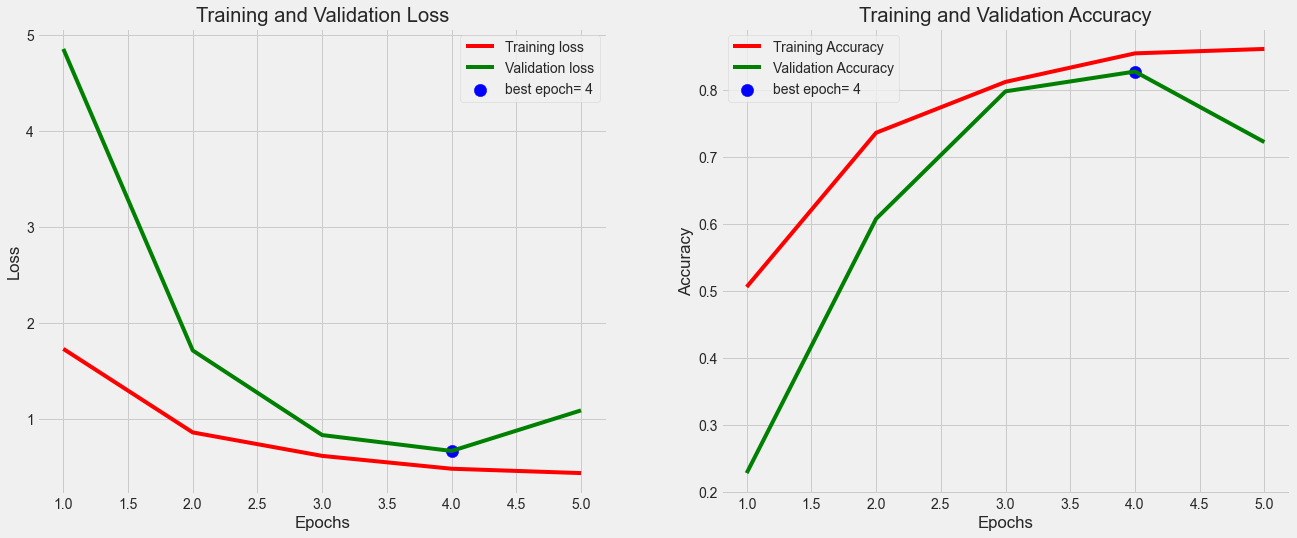

In [25]:
def tr_plot(tr_data, start_epoch):
    # Plot the training and validation data
    tacc = tr_data.history['accuracy']
    tloss = tr_data.history['loss']
    vacc = tr_data.history['val_accuracy']
    vloss = tr_data.history['val_loss']
    Epoch_count = len(tacc) + start_epoch
    Epochs = []
    for i in range(start_epoch, Epoch_count):
        Epochs.append(i + 1)
    index_loss = np.argmin(vloss)  # this is the epoch with the lowest validation loss
    val_lowest = vloss[index_loss]
    index_acc = np.argmax(vacc)
    acc_highest = vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label = 'best epoch= ' + str(index_loss + 1 + start_epoch)
    vc_label = 'best epoch= ' + str(index_acc + 1 + start_epoch)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].scatter(index_loss + 1 + start_epoch, val_lowest, s=150, c='blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot(Epochs, tacc, 'r', label='Training Accuracy')
    axes[1].plot(Epochs, vacc, 'g', label='Validation Accuracy')
    axes[1].scatter(index_acc + 1 + start_epoch, acc_highest, s=150, c='blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()


tr_plot(history, 0)

503/503 [==============================] - 149s 290ms/step


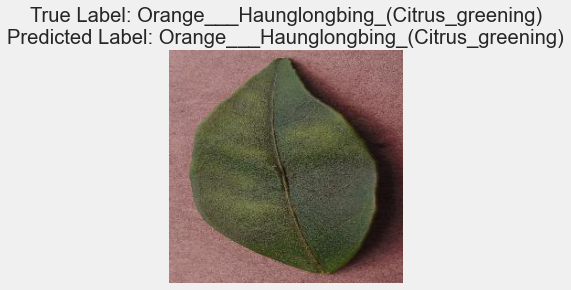

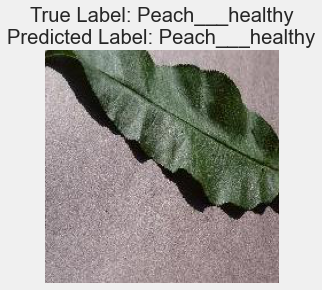

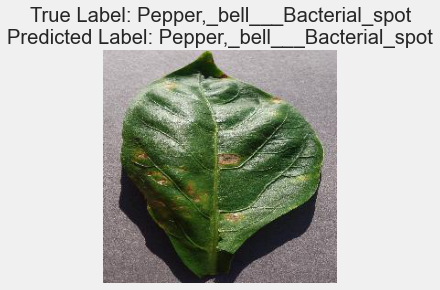

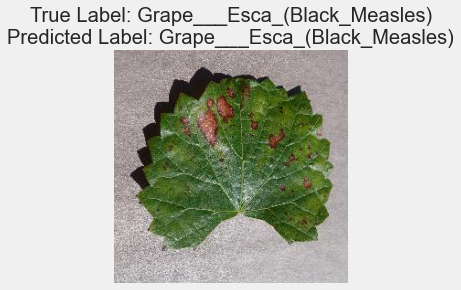

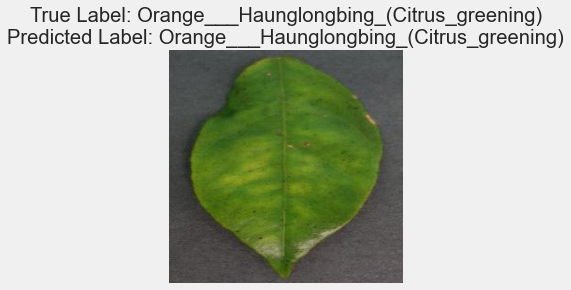

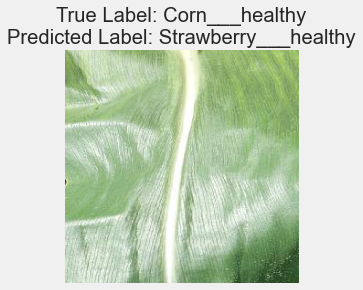

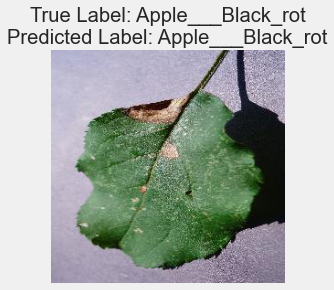

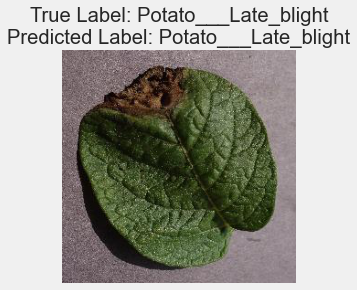

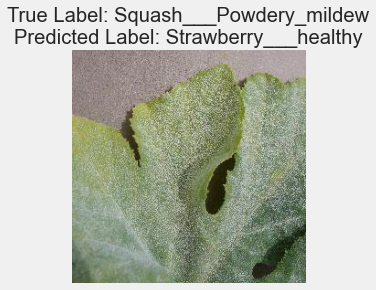

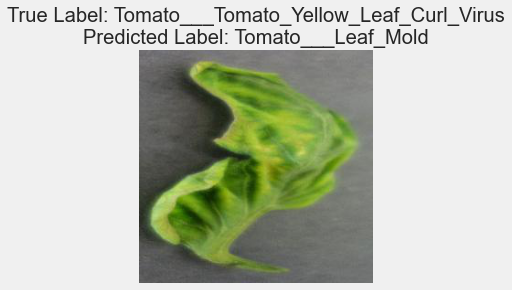

There were 809 errors in 3018 tests for an accuracy of  73.19
Shape of y_true: (3018,)
Shape of y_pred: (3018,)
Classification Report:
----------------------
                                                precision    recall  f1-score   support

                           Apple___Apple_scab     0.6000    0.9600    0.7385        50
                            Apple___Black_rot     0.7586    0.8800    0.8148        50
                     Apple___Cedar_apple_rust     1.0000    0.6800    0.8095        50
                              Apple___healthy     0.9200    0.8415    0.8790        82
                          Blueberry___healthy     0.9706    0.8800    0.9231        75
                      Cherry___Powdery_mildew     1.0000    0.8654    0.9278        52
                             Cherry___healthy     0.8889    0.8000    0.8421        50
   Corn___Cercospora_leaf_spot Gray_leaf_spot     0.5319    1.0000    0.6944        50
                           Corn___Common_rust     1.0000 

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def predictor(test_gen, test_steps):
    y_pred = []
    y_true = test_gen.labels[:len(test_gen.filenames)]  # Slice y_true to match the length of y_pred
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)
    
    image_limit = 10  # Limit the number of predicted images shown
    image_count = 0  # Counter for the number of predicted images displayed
    
    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        true_index = y_true[i]  # labels are integer values
        if pred_index != true_index:  # a misclassification has occurred
            errors += 1
        y_pred.append(pred_index)

        # Show the predicted image, true label, and predicted label
        if image_count < image_limit:
            try:
                image_path = test_gen.filepaths[i]
                image = plt.imread(image_path)
                plt.imshow(image)
                plt.axis('off')  # Hide axis
                plt.title(f"True Label: {classes[true_index]}\nPredicted Label: {classes[pred_index]}")
                plt.show()
                
                image_count += 1  # Increment the counter for displayed images
            except Exception as e:
                print(f"Error displaying image: {e}")
    
    acc = (1 - errors / tests) * 100
    print(f'There were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
    
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    
    print("Shape of y_true:", y_true.shape)
    print("Shape of y_pred:", y_pred.shape)
    
    if class_count <= 30:
        cm = confusion_matrix(y_true, y_pred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4)  # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
    return errors, tests

# Call the predictor function
errors, tests = predictor(test_gen, test_steps)